# Worksheet 12

Name:  Suin Lee
UID:  U68592929

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1. This is a classification problem.
2. This is not a classification problem.
3. If we consider the star ratings as separate categories, this could be classified as a classification problem. However, given that the ratings have an ordinal nature, it might also be seen as an ordinal regression problem
4. This is not a classification problem.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

Initially, I'd start by cleansing and preparing the data, followed by dividing it. Subsequently, I'd select an appropriate model based on the specific problem and proceed to train it with the training dataset. Lastly, I'd assess the model's performance.

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting occurs when a machine learning model is overly simplistic, making it unable to effectively capture the inherent data patterns. Signs of underfitting include subpar performance on the training dataset, overly basic predictions, and elevated errors in testing and validation.

On the other hand, overfitting arises when the model is excessively complex and starts capturing noise in the training data as if it were genuine patterns. This can result in a lack of generalization to new, unseen data. Overfitting is often characterized by excellent performance on the training data but poor performance on the validation or testing datasets.

### K Nearest Neighbors

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}

a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

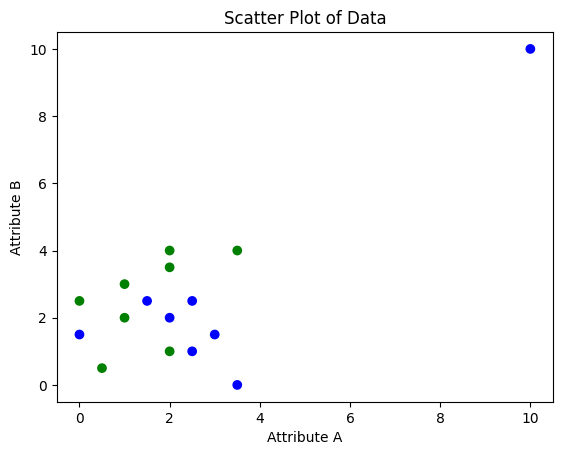

In [5]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot of Data')
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

In [7]:
attribute_a = np.array(data["Attribute A"])
attribute_b = np.array(data["Attribute B"])
classes = np.array(data["Class"])

# Identifying the index of the outlier
outlier_index = np.where((attribute_a == 10) & (attribute_b == 10))[0][0]

# Removing the outlier from the dataset
attribute_a_cleaned = np.delete(attribute_a, outlier_index)
attribute_b_cleaned = np.delete(attribute_b, outlier_index)
classes_cleaned = np.delete(classes, outlier_index)



Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Potential noise points can be the red point at (3,1.5) since it's surrounded by blue points. Another would be red point at (2,2.5) as it is somewhat isolated from the other red points.

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

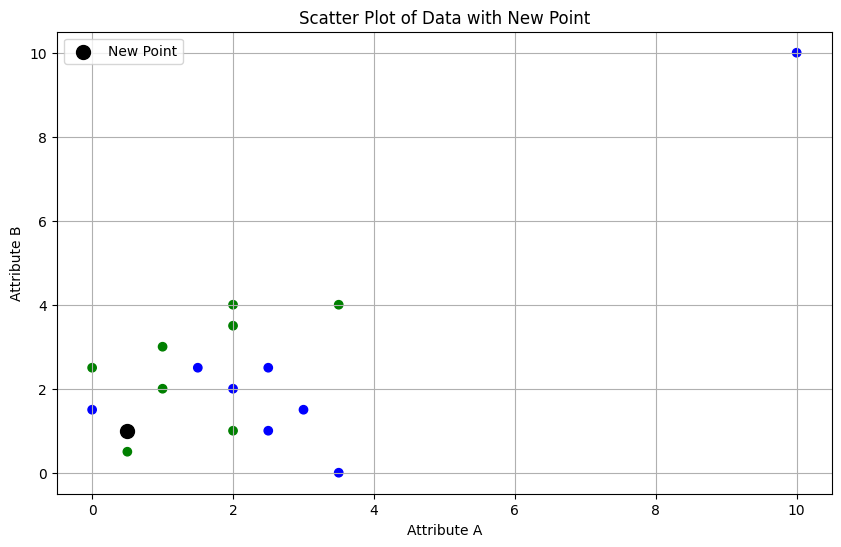

In [8]:
# Coordinates of the new point
new_point = (0.5, 1)

# Re-plotting the data along with the new point
plt.figure(figsize=(10, 6))
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[np.array(data["Class"])])
plt.scatter(*new_point, color='black', label='New Point', s=100, edgecolors='black')
plt.xlabel('Attribute A')
plt.ylabel('Attribute B')
plt.title('Scatter Plot of Data with New Point')
plt.legend()
plt.grid(True)
plt.show()


e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

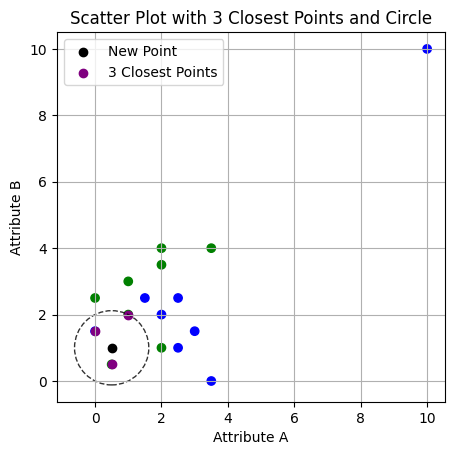

In [11]:
def n_closest_to(example, n):
    attribute_a = np.array(data["Attribute A"])
    attribute_b = np.array(data["Attribute B"])
    distances = np.sqrt((attribute_a - example[0])**2 + (attribute_b - example[1])**2)
    closest_indices = np.argsort(distances)[:n]
    return attribute_a[closest_indices], attribute_b[closest_indices]

location = (0.5, 1)
closest_points = n_closest_to(location, 3)
radius = np.max(np.sqrt((location[0] - closest_points[0])**2 + (location[1] - closest_points[1])**2))
_, axes = plt.subplots()
axes.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
axes.scatter(*location, color='black', label='New Point')
axes.scatter(closest_points[0], closest_points[1], color='purple', label='3 Closest Points')
cir = plt.Circle(location, radius, fill=False, alpha=0.8, linestyle='dashed')
axes.add_patch(cir)
axes.set_aspect('equal')
axes.set_xlabel('Attribute A')
axes.set_ylabel('Attribute B')
axes.set_title('Scatter Plot with 3 Closest Points and Circle')
plt.legend()
plt.grid(True)
plt.show()


f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [14]:
def majority(points):
    # Convert the points to a list of tuples for indexing
    points_list = list(zip(points[0], points[1]))
    
    # Retrieve the classes of the provided points
    point_classes = [data["Class"][data_index] for data_index, point in enumerate(zip(data["Attribute A"], data["Attribute B"])) if point in points_list]
    
    # Count the occurrences of each class
    class_counts = np.bincount(point_classes)
    
    # Return the class that appears most frequently. In case of a tie, return 0 (default class).
    return np.argmax(class_counts)

# Using the majority function to find the class of the new point
assigned_class = majority(closest_points)
print("The class assigned to the new point is:", assigned_class)


The class assigned to the new point is: 1


g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [18]:
count = 0
for i in range(len(data["Attribute A"])):
    actual_class = data["Class"][i]
    test_point = np.array([data["Attribute A"][i], data["Attribute B"][i]])
    training_points = np.delete(np.column_stack((data["Attribute A"], data["Attribute B"])), i, axis=0)
    training_classes = np.delete(data["Class"], i)
    closest_points = n_closest_to(test_point, 3)
    prediction = majority(closest_points)
    if prediction == actual_class:
        count += 1

overall_accuracy = count / len(data["Attribute A"])
print("Overall accuracy =", overall_accuracy)

Overall accuracy = 0.75
